In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

df = pd.read_csv('./datasets/AppleStore.csv')

In [2]:
sns.set(style="white", context="notebook", palette="deep")

COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]

sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

In [3]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [8]:
df.iloc[:3]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [9]:
df.price.mean()

1.7262178685562626

In [18]:
df.describe(include="O")

,track_name,currency,ver,cont_rating,prime_genre
count,7197,7197,7197,7197,7197
unique,7195,1,1590,4,23
top,VR Roller Coaster,USD,1.0,4+,Games
freq,2,7197,317,4433,3862


In [19]:
df.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


## Drop column as it is not important

In [10]:
df = df.drop("currency", axis="columns")

### Convert bytes column to MB to make it more readable

In [13]:
def _byte_resizer(data):
    return np.around(data / 1000000, decimals=2)

df["size_Mb"] = df["size_bytes"].apply(_byte_resizer)
df.drop("size_bytes", axis="columns", inplace=True)

,Unnamed: 0,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_Mb
0,1,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.79
1,2,281796108,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,158.58
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,100.52
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,128.51
4,5,282935706,Bible,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,92.77


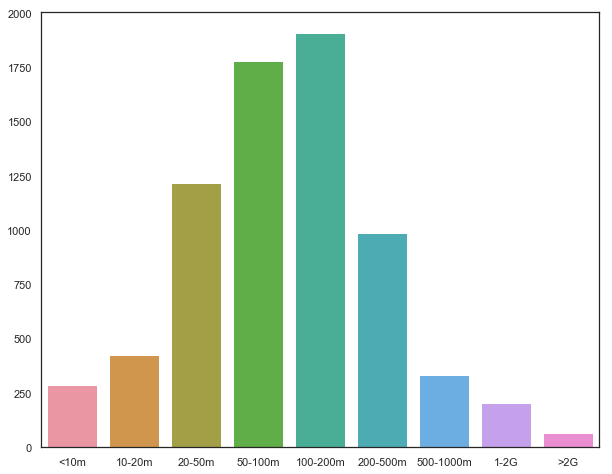

In [23]:
# bins increasing exponentially
plt.subplots(figsize=(10, 8))
BINS = [0.00, 10.00, 20.00, 50.00, 100.00, 200.00, 500.00, 1000.00, 2000.00, np.inf]
LABELS = ["<10m", "10-20m", "20-50m", "50-100m", "100-200m", "200-500m", "500-1000m", "1-2G", ">2G"]
freqs = pd.cut(df["size_Mb"], BINS, include_lowest=True, labels=LABELS)
sns.barplot(y=freqs.value_counts().values, x=freqs.value_counts().index)

In [18]:
# priced apps vs unpriced apps
BINS = [-np.inf, 0.00, np.inf]
LABELS = ["FREE", "PAID"]
colors = ['lightcoral', 'yellowgreen']

In [19]:
df["price_categories"] = pd.cut(df["price"], BINS, include_lowest=True, labels=LABELS)

(-1.1057396083108322,
 1.1002733599434824,
 -1.1276675874208923,
 1.1112839653444184)

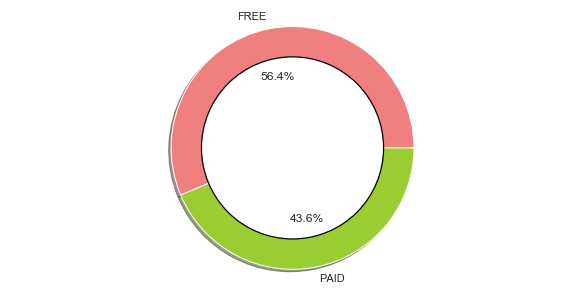

In [21]:
fig, axs = plt.subplots(figsize=(10, 5))
price_df = df["price_categories"].value_counts()

plt.pie(price_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')


In [24]:
free_apps = df.loc[df["price_categories"] == "FREE"]
paid_apps = df.loc[df["price_categories"] == "PAID"]

free_apps_rated = free_apps.sort_values(by=["rating_count_tot"], ascending=False)
paid_apps_rated = paid_apps.sort_values(by=["rating_count_tot"], ascending=False)

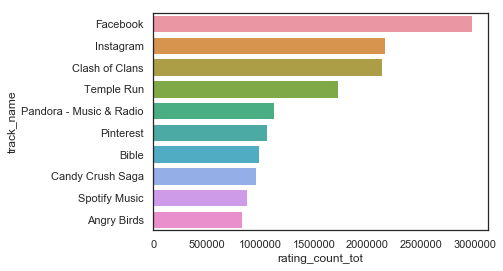

In [25]:
sns.barplot(x=free_apps_rated["rating_count_tot"][:10], y=free_apps_rated["track_name"][:10])

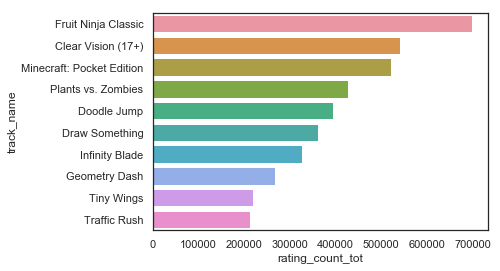

In [26]:
sns.barplot(x=paid_apps_rated["rating_count_tot"][:10], y=paid_apps_rated["track_name"][:10])

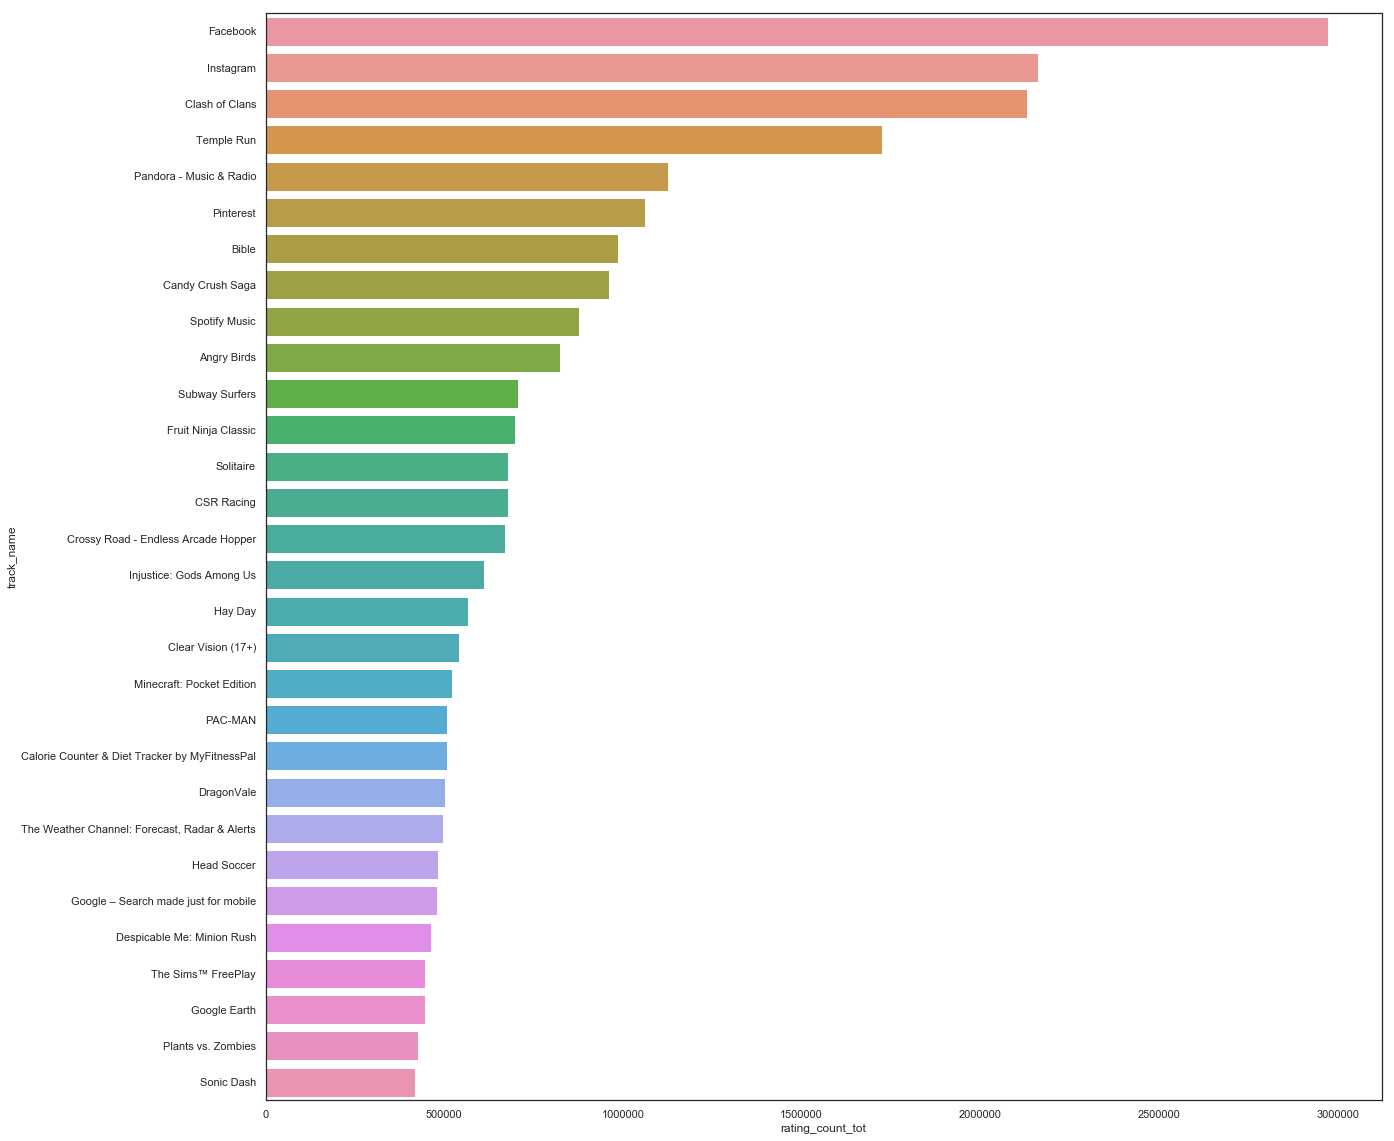

In [28]:
plt.subplots(figsize=(20, 20))
ratings = df.sort_values(by=["rating_count_tot"], ascending=False)
sns.barplot(x=ratings["rating_count_tot"][:30], y=ratings["track_name"][:30])

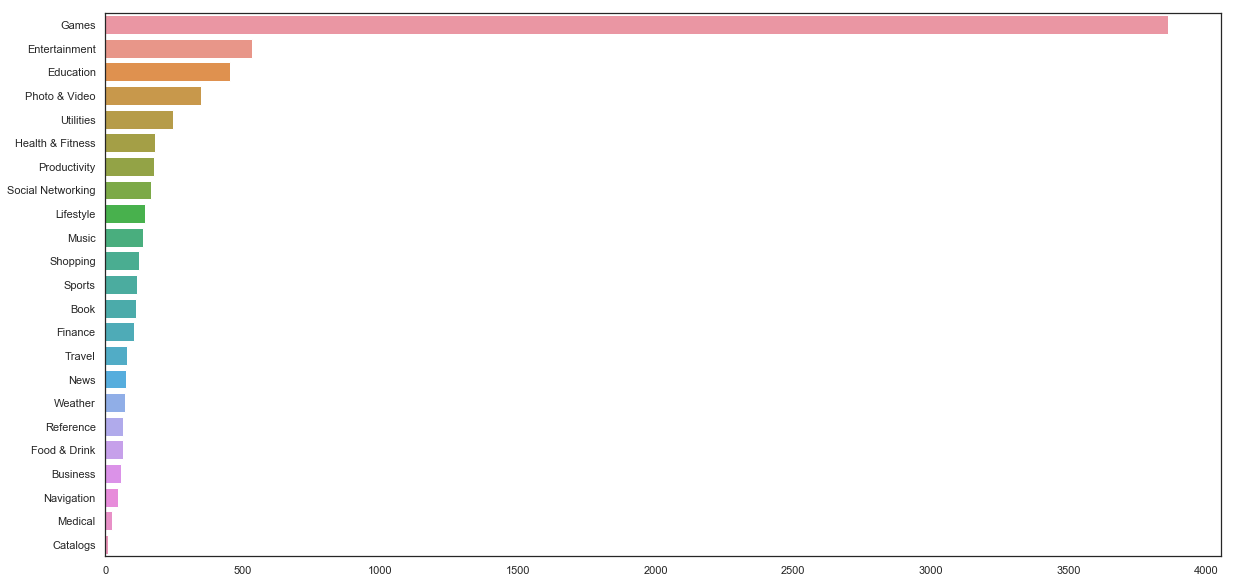

In [29]:
genres = df["prime_genre"].value_counts()
genres.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 10))
sns.barplot(x=genres.values, y=genres.index, order=genres.index, orient="h")

In [30]:
games = df.loc[df["prime_genre"] == "Games"]
games.head()


,Unnamed: 0,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_Mb,price_categories
0,1,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.79,PAID
5,6,283619399,Shanghai Mahjong,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,10.49,PAID
9,10,284736660,Ms. PAC-MAN,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,70.02,PAID
10,11,284791396,Solitaire by MobilityWare,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,49.62,PAID
11,12,284815117,SCRABBLE Premium,7.99,105776,166,3.5,2.5,5.19.0,4+,Games,37,0,6,1,227.55,PAID


In [31]:
prices = (games["price"].value_counts()) / (games["price"].shape[0]) * 100
prices.sort_values(ascending=False, inplace=True)

[Text(0, 0.5, 'percent (%)'), Text(0.5, 0, 'USD')]

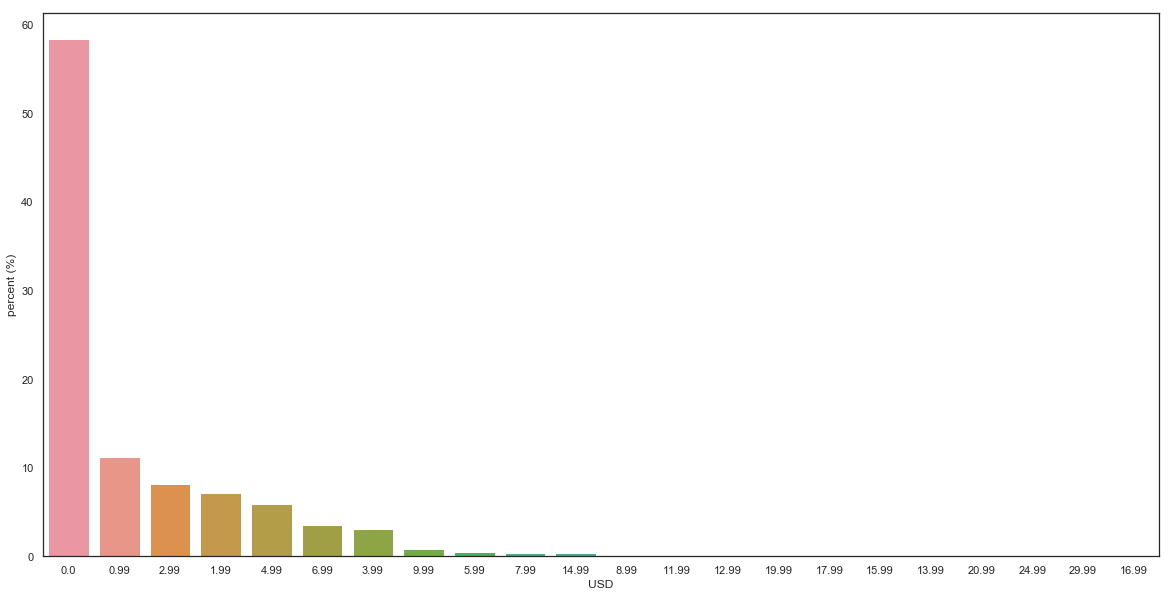

In [32]:
plt.subplots(figsize=(20, 10))
ax = sns.barplot(y=prices.values, x=prices.index, order=prices.index)
ax.set(xlabel="USD", ylabel="percent (%)")

In [33]:
free_games = games.loc[games["price_categories"] == "FREE"]
paid_games = games.loc[games["price_categories"] == "PAID"]

free_games_rated = free_games.sort_values(by=["rating_count_tot"], ascending=False)
paid_games_rated = paid_games.sort_values(by=["rating_count_tot"], ascending=False)


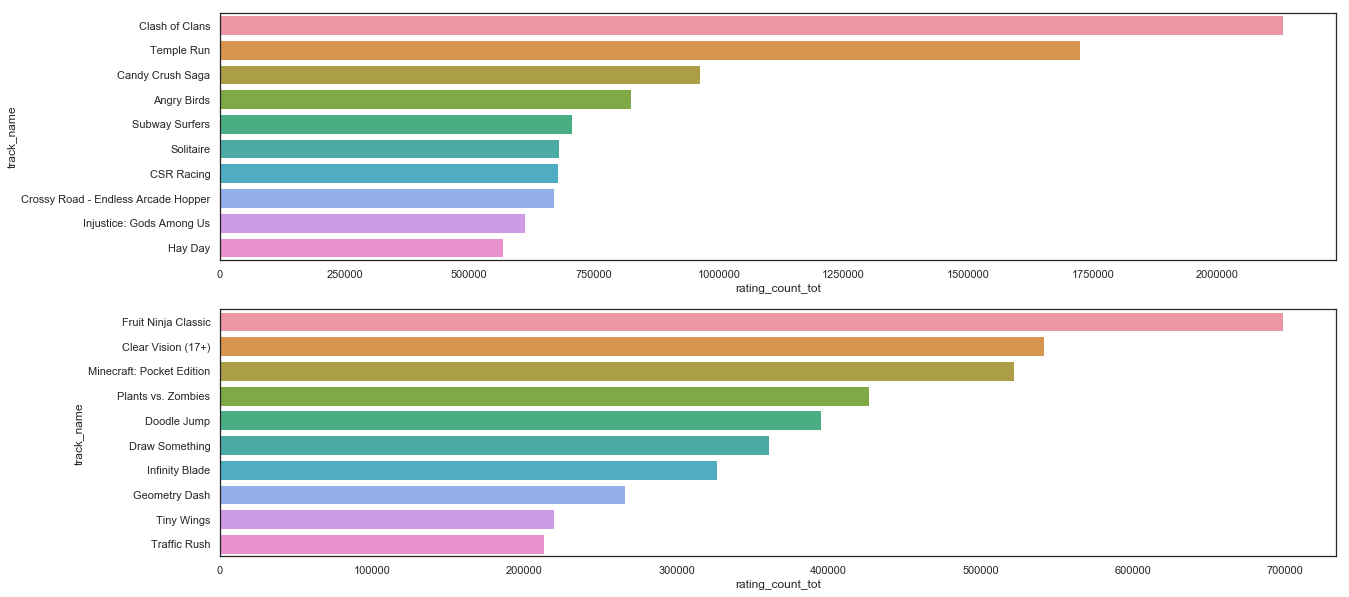

In [34]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(x=free_games_rated["rating_count_tot"][:10], y=free_games_rated["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated["rating_count_tot"][:10], y=paid_games_rated["track_name"][:10], ax=ax2)